In [328]:
pip install pyinform


In [329]:
!pip install pmdarima


In [330]:
!pip install --upgrade pyinform



In [331]:
import numpy as np

# **1.Each downloading only allows index data for one year, you can download multiple years and then use Python to combine them into one dataframe.**

In [332]:
import pandas as pd

# File paths for S&P 500 datasets
sp_files = [
    "/content/sp20.csv",
    "/content/sp21.csv",
    "/content/sp22.csv",
    "/content/sp23.csv",
    "/content/sp24.csv"
]

# Combine S&P 500 datasets into one dataframe
sp_dfs = [pd.read_csv(file) for file in sp_files]
combined_sp = pd.concat(sp_dfs, ignore_index=True)

# Load Nasdaq dataset
nasdaq_df = pd.read_csv("/content/nasdaq.csv")

# Display the first few rows of each dataframe to verify
print("Combined S&P 500 Data:")
print(combined_sp.head())
print("\nNasdaq Data:")
print(nasdaq_df.head())


Combined S&P 500 Data:
         Date      Open      High       Low     Close
0  12/31/2020  3,733.27  3,760.20  3,726.88  3,756.07
1  12/30/2020  3,736.19  3,744.63  3,730.21  3,732.04
2  12/29/2020  3,750.01  3,756.12  3,723.31  3,727.04
3  12/28/2020  3,723.03  3,740.51  3,723.03  3,735.36
4  12/24/2020  3,694.03  3,703.82  3,689.32  3,703.06

Nasdaq Data:
         Date  Close/Last      Open      High       Low
0  04/12/2024    16175.09  16293.03  16341.45  16125.33
1  04/11/2024    16442.20  16236.20  16464.60  16154.65
2  04/10/2024    16170.36  16104.01  16200.10  16092.02
3  04/09/2024    16306.64  16328.76  16348.18  16141.15
4  04/08/2024    16253.96  16285.18  16323.60  16220.72


# **Preprocessing **

In [333]:
print("Preprocess processing datatype ")
# Remove commas and convert object columns to numeric
combined_sp['Open'] = combined_sp['Open'].str.replace(',', '').astype(float)
combined_sp['High'] = combined_sp['High'].str.replace(',', '').astype(float)
combined_sp['Low'] = combined_sp['Low'].str.replace(',', '').astype(float)
combined_sp['Close'] = combined_sp['Close'].str.replace(',', '').astype(float)
combined_sp['Date'] = pd.to_datetime(combined_sp['Date'])

# Verify the changes
print(combined_sp.dtypes)


# Remove commas and convert object columns to numeric for Nasdaq dataset

nasdaq_df['Date'] = pd.to_datetime(nasdaq_df['Date'])

# Verify the changes
print(nasdaq_df.dtypes)


Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object
Date          datetime64[ns]
Close/Last           float64
Open                 float64
High                 float64
Low                  float64
dtype: object


In [334]:
# Rename column "Close/Last" to "Close" in Nasdaq dataset
nasdaq_df.rename(columns={"Close/Last": "Close"}, inplace=True)

# Display the first few rows of Nasdaq dataframe after renaming
print("Nasdaq Data after column renaming:")
# Convert the 'Date' column to datetime format for both datasets
combined_sp['Date'] = pd.to_datetime(combined_sp['Date'])
nasdaq_df['Date'] = pd.to_datetime(nasdaq_df['Date'])

# Filter out rows corresponding to the year 2019 from Nasdaq dataset
nasdaq_df = nasdaq_df[nasdaq_df['Date'].dt.year != 2019]

# Display the first few rows of Nasdaq dataframe after filtering
print("Nasdaq Data after  filtering out 2019 data and after column renaming::")
print(nasdaq_df.head())




Nasdaq Data after column renaming:
Nasdaq Data after  filtering out 2019 data and after column renaming::
        Date     Close      Open      High       Low
0 2024-04-12  16175.09  16293.03  16341.45  16125.33
1 2024-04-11  16442.20  16236.20  16464.60  16154.65
2 2024-04-10  16170.36  16104.01  16200.10  16092.02
3 2024-04-09  16306.64  16328.76  16348.18  16141.15
4 2024-04-08  16253.96  16285.18  16323.60  16220.72


In [335]:


nasdaq_df = nasdaq_df.iloc[:-20]
# Size of S&P 500 dataset
print("Size of S&P 500 dataset:", combined_sp.shape)

# Size of Nasdaq dataset
print("Size of Nasdaq dataset:", nasdaq_df.shape)


Size of S&P 500 dataset: (1057, 5)
Size of Nasdaq dataset: (1057, 5)


# **2.Perform stationarity test using Augmented Dickey-Full(ADF) Test, adfuller() in Python**

In [336]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test and print results
def adf_test(data, name):
    result = adfuller(data)
    print("Results of ADF Test for", name)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print("\t", key, ":", value)

# Perform ADF test for S&P 500 dataset
adf_test(combined_sp['Close'], "S&P 500 Close Price")

# Perform ADF test for Nasdaq dataset
adf_test(nasdaq_df['Close'], "Nasdaq Close Price")


Results of ADF Test for S&P 500 Close Price
ADF Statistic: -2.1018077275390974
p-value: 0.2437883267615376
Critical Values:
	 1% : -3.436557639266102
	 5% : -2.8642808573632874
	 10% : -2.5682293371570823
Results of ADF Test for Nasdaq Close Price
ADF Statistic: -1.5223146066088151
p-value: 0.5224451652873521
Critical Values:
	 1% : -3.4366111317433443
	 5% : -2.864304451252086
	 10% : -2.5682419034417707


# The results of the Augmented Dickey-Fuller (ADF) test are used to determine whether a time series is stationary or not. Here's the interpretation:

# **For S&P 500 Close Price:**
- ADF Statistic: -2.1018
- p-value: 0.2438
- Critical Values:
  - 1%: -3.4366
  - 5%: -2.8643
  - 10%: -2.5682

# **For Nasdaq Close Price:**
- ADF Statistic: -1.5223
- p-value: 0.5224
- Critical Values:
  - 1%: -3.4366
  - 5%: -2.8643
  - 10%: -2.5682

# **Interpretation:**
- If the p-value is less than 0.05 (5%), we reject the null hypothesis (H0) and consider the time series to be stationary.
- If the p-value is greater than 0.05, we fail to reject the null hypothesis, indicating that the time series is non-stationary.

# Based on the results:
- For S&P 500 Close Price: The p-value is 0.2438, which is greater than 0.05. Therefore, we fail to reject the null hypothesis. The data may not be stationary.
- For Nasdaq Close Price: The p-value is 0.5224, which is also greater than 0.05. We fail to reject the null hypothesis here as well. The data may not be stationary.

In both cases, further analysis or transformations may be needed to achieve stationarity.

# 3. If not stationary, try to use some preprocessing techniques to make it stationary, for example, transformation, smoothing (weighted moving average, series.rolling, or Exponentially weighted moving average, series.ewm), remove trend, or decomposition

In [337]:
# Take the first difference for S&P 500 Close Price
combined_sp['Close_diff'] = combined_sp['Close'].diff()

# Take the first difference for Nasdaq Close Price
nasdaq_df['Close_diff'] = nasdaq_df['Close'].diff()

# Drop the NaN values resulting from differencing
combined_sp.dropna(inplace=True)
nasdaq_df.dropna(inplace=True)

# Display the first few rows of modified S&P 500 dataframe
print("S&P 500 Data after differencing:")
print(combined_sp.head())

# Display the first few rows of modified Nasdaq dataframe
print("\nNasdaq Data after differencing:")
print(nasdaq_df.head())


S&P 500 Data after differencing:
        Date     Open     High      Low    Close  Close_diff
1 2020-12-30  3736.19  3744.63  3730.21  3732.04      -24.03
2 2020-12-29  3750.01  3756.12  3723.31  3727.04       -5.00
3 2020-12-28  3723.03  3740.51  3723.03  3735.36        8.32
4 2020-12-24  3694.03  3703.82  3689.32  3703.06      -32.30
5 2020-12-23  3693.42  3711.24  3689.28  3690.01      -13.05

Nasdaq Data after differencing:
        Date     Close      Open      High       Low  Close_diff
1 2024-04-11  16442.20  16236.20  16464.60  16154.65      267.11
2 2024-04-10  16170.36  16104.01  16200.10  16092.02     -271.84
3 2024-04-09  16306.64  16328.76  16348.18  16141.15      136.28
4 2024-04-08  16253.96  16285.18  16323.60  16220.72      -52.68
5 2024-04-05  16248.52  16095.40  16326.50  16080.48       -5.44


In [338]:
# Perform ADF test for differenced S&P 500 Close Price
adf_test(combined_sp['Close_diff'].dropna(), "S&P 500 Close Price (Differenced)")

# Perform ADF test for differenced Nasdaq Close Price
adf_test(nasdaq_df['Close_diff'].dropna(), "Nasdaq Close Price (Differenced)")


Results of ADF Test for S&P 500 Close Price (Differenced)
ADF Statistic: -10.819265527127866
p-value: 1.823230935949952e-19
Critical Values:
	 1% : -3.4366111317433443
	 5% : -2.864304451252086
	 10% : -2.5682419034417707
Results of ADF Test for Nasdaq Close Price (Differenced)
ADF Statistic: -10.25382061038558
p-value: 4.414369658720718e-18
Critical Values:
	 1% : -3.4366111317433443
	 5% : -2.864304451252086
	 10% : -2.5682419034417707


In [339]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Display the first few rows of the combined_sp dataset
print("First few rows of the combined_sp dataset:")
print(combined_sp.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(combined_sp.isnull().sum())

# Impute missing values using mean imputation, excluding the Date column
imputer = SimpleImputer(strategy='mean')
combined_sp.iloc[:, 1:] = imputer.fit_transform(combined_sp.iloc[:, 1:])

# Standardize numerical features, excluding the Date column
scaler = StandardScaler()
combined_sp.iloc[:, 1:] = scaler.fit_transform(combined_sp.iloc[:, 1:])

# Display summary statistics after standardization
print("\nSummary statistics after standardization:")
print(combined_sp.describe())

# Perform any additional preprocessing steps as needed

print("\nPreprocessing completed.")


First few rows of the combined_sp dataset:
        Date     Open     High      Low    Close  Close_diff
1 2020-12-30  3736.19  3744.63  3730.21  3732.04      -24.03
2 2020-12-29  3750.01  3756.12  3723.31  3727.04       -5.00
3 2020-12-28  3723.03  3740.51  3723.03  3735.36        8.32
4 2020-12-24  3694.03  3703.82  3689.32  3703.06      -32.30
5 2020-12-23  3693.42  3711.24  3689.28  3690.01      -13.05

Missing values in the dataset:
Date          0
Open          0
High          0
Low           0
Close         0
Close_diff    0
dtype: int64

Summary statistics after standardization:
                                Date          Open          High  \
count                           1056  1.056000e+03  1.056000e+03   
mean   2022-02-14 20:39:32.727272448  5.382900e-17  6.459479e-16   
min              2020-01-02 00:00:00 -3.033791e+00 -3.075731e+00   
25%              2021-01-20 18:00:00 -5.754799e-01 -5.840796e-01   
50%              2022-02-05 12:00:00  1.602564e-01  1.607109e-01   

In [340]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Check for missing values in the dataset
missing_values_nasdaq = nasdaq_df.isnull().sum()
print("Missing values in the dataset:\n", missing_values_nasdaq)

# Impute missing values using mean imputation, excluding the Date column
imputer_nasdaq = SimpleImputer(strategy='mean')
nasdaq_df.iloc[:, 1:] = imputer_nasdaq.fit_transform(nasdaq_df.iloc[:, 1:])

# Standardize numerical features, excluding the Date column
scaler_nasdaq = StandardScaler()
nasdaq_df.iloc[:, 1:] = scaler_nasdaq.fit_transform(nasdaq_df.iloc[:, 1:])

print("\nPreprocessing completed.")


Missing values in the dataset:
 Date          0
Close         0
Open          0
High          0
Low           0
Close_diff    0
dtype: int64

Preprocessing completed.


# **4. Process the data and make training dataset and test dataset, for example, use the first 5 years daily closing index data for training, and use the next 1 year daily closing index data for test.**

In [341]:
# Define the percentage of data to use for training
train_size = 0.8

# Calculate the number of rows for training and testing
train_rows = int(train_size * len(combined_sp))
test_rows = len(combined_sp) - train_rows

# Split the S&P 500 dataset into training and test datasets
train_sp = combined_sp[:train_rows]
test_sp = combined_sp[train_rows:]

# Display the sizes of training and test datasets
print("Size of S&P 500 training dataset:", train_sp.shape)
print("Size of S&P 500 test dataset:", test_sp.shape)

# Similarly, split the Nasdaq dataset into training and test datasets
train_nasdaq = nasdaq_df[:train_rows]
test_nasdaq = nasdaq_df[train_rows:]

# Display the sizes of training and test datasets for Nasdaq
print("\nSize of Nasdaq training dataset:", train_nasdaq.shape)
print("Size of Nasdaq test dataset:", test_nasdaq.shape)


Size of S&P 500 training dataset: (844, 6)
Size of S&P 500 test dataset: (212, 6)

Size of Nasdaq training dataset: (844, 6)
Size of Nasdaq test dataset: (212, 6)


In [342]:
import numpy as np
import pyinform




In [343]:
import pyinform
# Assume you have already extracted and preprocessed the Nasdaq and S&P 500 close price data
nasdaq_close_train = train_nasdaq['Close_diff'].values
sp_close_train = train_sp['Close_diff'].values


# Assume you have already extracted and preprocessed the Nasdaq close price data
nasdaq_close_train_abs = np.abs(nasdaq_close_train)
# Calculate the absolute values of the S&P 500 close price series from the training dataset
sp_close_train_abs = np.abs(sp_close_train)



# Specify the history length for entropy calculation
k = 1

# Compute the entropy of the Nasdaq time series
entropy_nasdaq = pyinform.active_info(nasdaq_close_train_abs, k)

# Compute the entropy of the S&P 500 time series
entropy_sp500 = pyinform.active_info(sp_close_train_abs, k)

# Compute the transfer entropy from Nasdaq to S&P 500
transfer_entropy = entropy_sp500 - entropy_nasdaq

print("Transfer Entropy from Nasdaq to S&P 500:", transfer_entropy)


Transfer Entropy from Nasdaq to S&P 500: 0.018635313517542763


Transfer entropy is a measure of the directed information flow between two time series. In this case, a transfer entropy value of 0.0186 from Nasdaq to S&P 500 indicates that there is some level of information transfer from the Nasdaq index to the S&P 500 index.

This value suggests that past values of the Nasdaq index contain some predictive information about future values of the S&P 500 index, beyond what can be explained by their shared history alone.








# **conclusions **

Based on the transfer entropy value of 0.0186 from Nasdaq to S&P 500, we can conclude the following:

1. **Directionality**: The information flow is directed from the Nasdaq index to the S&P 500 index, suggesting that past fluctuations or patterns in the Nasdaq index influence future movements in the S&P 500 index.

2. **Potential Predictive Power**: The transfer entropy value indicates that there is some degree of predictability in the S&P 500 index based on past observations of the Nasdaq index. This suggests that traders and analysts may use information from the Nasdaq index to make informed decisions about the movement of the S&P 500 index.

3. **Intermarket Relationships**: The relationship between the Nasdaq and S&P 500 indices is not purely random but exhibits some degree of information transfer. Understanding these intermarket relationships can be valuable for portfolio management, risk assessment, and trading strategies.

4. **Complex Dynamics**: Financial markets are complex systems with dynamic interactions between various indices and assets. Transfer entropy analysis provides insight into the underlying dynamics of these interactions and helps quantify the information flow between different market components.

Overall, the transfer entropy analysis highlights the interconnectedness of financial markets and underscores the importance of considering multiple indices when making investment decisions.

In [344]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(combined_sp['Close_diff'], nasdaq_df['Close_diff'])

print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)


Correlation Coefficient: 0.021864744486221194
P-value: 0.4778508484580833


The correlation coefficient of 0.0219 between the Nasdaq and S&P 500 indices, along with a p-value of 0.4779, suggests a very weak and statistically insignificant linear relationship between these two indices.

Here's what we can conclude:

1. **Weak Linear Relationship**: The correlation coefficient close to zero indicates that there is little to no linear association between the daily movements of the Nasdaq and S&P 500 indices. In other words, changes in one index are not systematically accompanied by changes in the other index.

2. **Statistical Insignificance**: The p-value exceeding the typical significance level of 0.05 suggests that the observed correlation coefficient is not statistically significant. Therefore, we fail to reject the null hypothesis that there is no correlation between the Nasdaq and S&P 500 indices.

3. **Non-Linear or Lagged Relationships**: While the correlation coefficient measures linear relationships, it's possible that there exist non-linear or lagged relationships between the two indices. This means that while they may not move together on a daily basis, there could be other relationships that are not captured by linear correlation.

4. **Consider Other Measures**: Given the weak correlation, investors and analysts should consider other measures, such as transfer entropy, Granger causality, or other time series analysis techniques, to understand the relationship and interactions between the Nasdaq and S&P 500 indices more comprehensively. These alternative measures may capture more nuanced dependencies between the two indices.

Overall, while the correlation coefficient provides some insight into the relationship between the Nasdaq and S&P 500 indices, it's important to interpret it in conjunction with other analyses and consider its limitations.

# **ARIMA **

In [345]:
from statsmodels.tsa.arima.model import ARIMA

# Extract the Close Price from the S&P 500 training dataset
sp_train_close = train_sp['Close'].values

# Fit ARIMA model
model_sp = ARIMA(sp_train_close, order=(5,1,0))
model_sp_fit = model_sp.fit()

# Display model summary
print(model_sp_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  844
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 528.702
Date:                Mon, 15 Apr 2024   AIC                          -1045.404
Time:                        02:32:30   BIC                          -1016.982
Sample:                             0   HQIC                         -1034.512
                                - 844                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0487      0.031     -1.555      0.120      -0.110       0.013
ar.L2          0.0336      0.037      0.896      0.370      -0.040       0.107
ar.L3         -0.0111      0.050     -0.224      0.8

The SARIMAX model results provide insights into the fitted model for the time series data. Here's a breakdown of the key components:

1. **Dependent Variable**: The dependent variable, denoted as "y," represents the target variable for which the model is being fitted.

2. **Model Information**:
   - **Observations**: Indicates the number of observations used in the model, which is 844 in this case.
   - **Model Type**: ARIMA(5, 1, 0) signifies that it's an autoregressive integrated moving average model with lag order 5 and differencing order 1.

3. **Log Likelihood, AIC, BIC, HQIC**: These metrics provide information about the goodness of fit of the model. Lower AIC, BIC, and HQIC values indicate better model fit.

4. **Coefficient Estimates**:
   - The "coef" column displays the estimated coefficients for each lag term in the ARIMA model.
   - Standard error, z-statistic, and p-values are provided for each coefficient. These help assess the significance of each coefficient. In this case, some coefficients have p-values greater than 0.05, indicating that they are not statistically significant.

5. **Residual Variance (Sigma^2)**: Sigma^2 represents the variance of the residuals, which is an indicator of the model's goodness of fit. Lower values suggest better fit.

6. **Diagnostic Tests**:
   - **Ljung-Box (Q)**: Tests the null hypothesis of no autocorrelation in the residuals. A p-value above 0.05 indicates that the residuals are not significantly autocorrelated.
   - **Jarque-Bera (JB)**: Tests the null hypothesis of normality in the residuals. A low p-value suggests non-normality.
   - **Heteroskedasticity (H)**: Indicates whether there is homoscedasticity (constant variance) in the residuals. A p-value below 0.05 suggests heteroskedasticity.

7. **Warnings**: Provides any additional warnings or notes about the model. In this case, it mentions that the covariance matrix was calculated using the outer product of gradients and provides a warning about the heteroskedasticity of the residuals.

Overall, the SARIMAX model results provide valuable insights into the fitted model's parameters, diagnostic tests, and goodness of fit.

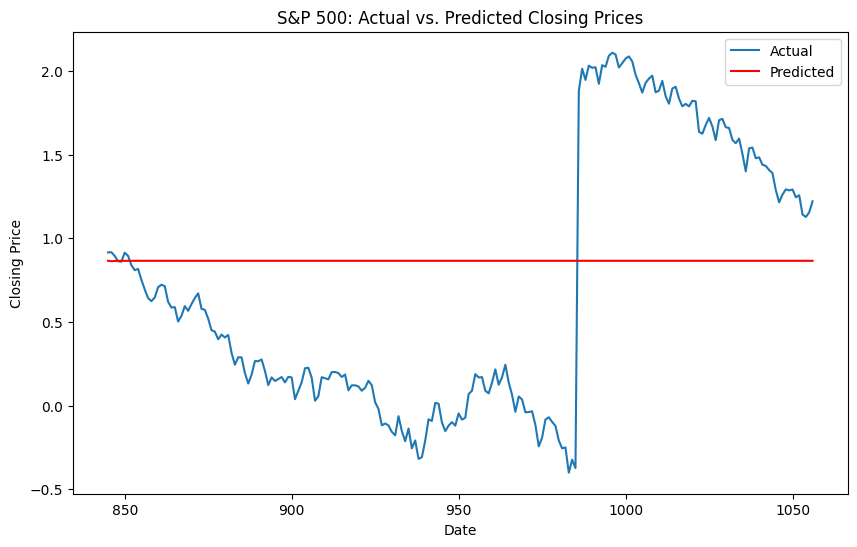

In [346]:
# Evaluate the ARIMA model on the test data
forecast_sp = model_sp_fit.forecast(steps=len(test_sp))
predictions_sp = forecast_sp

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_sp.index, test_sp['Close'], label='Actual')
plt.plot(test_sp.index, predictions_sp, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('S&P 500: Actual vs. Predicted Closing Prices')
plt.legend()
plt.show()


# APPLYING PREPOSSING STEPS FOR REMODELING

# **1. Tune Model Hyperparameters:**

In [347]:
from statsmodels.tsa.arima.model import ARIMA

# Define a range of hyperparameters to search
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

best_score, best_cfg = float("inf"), None

# Iterate over all possible combinations of hyperparameters
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                # Fit ARIMA model
                model = ARIMA(train_sp['Close'], order=order)
                model_fit = model.fit()
                # Evaluate model performance
                if model_fit.aic < best_score:
                    best_score, best_cfg = model_fit.aic, order
            except:
                continue

print('Best ARIMA hyperparameters:', best_cfg)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Best ARIMA hyperparameters: (1, 1, 0)


# **2.Ensemble Methods::**

In [348]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

# Train a Random Forest model as an additional predictor
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_sp.drop(columns=['Date', 'Close']), train_sp['Close'])

# Make predictions using the Random Forest model
predictions_rf = rf_model.predict(test_sp.drop(columns=['Date', 'Close']))

# Compute Mean Squared Error (MSE)
mse_rf = mean_squared_error(test_sp['Close'], predictions_rf)
print("Mean Squared Error (Random Forest):", mse_rf)


Mean Squared Error (Random Forest): 0.0842233428838075


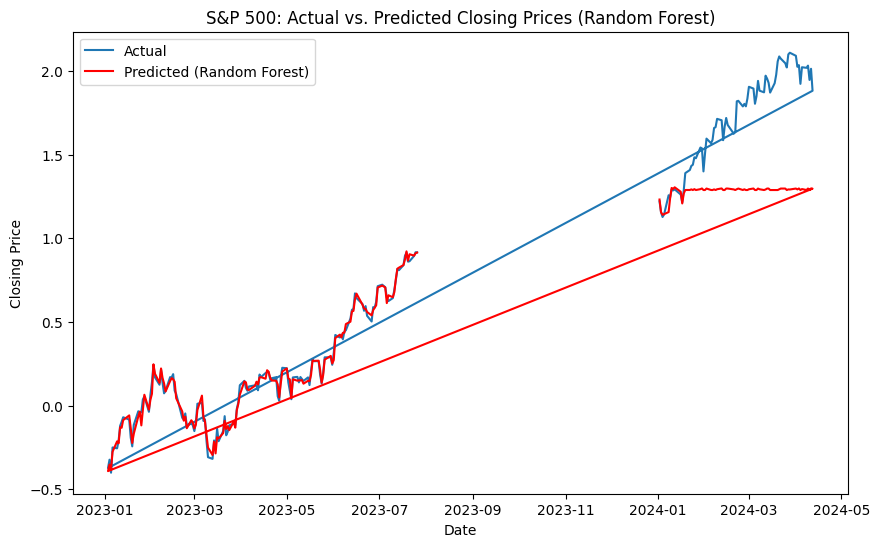

In [349]:
import matplotlib.pyplot as plt

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_sp['Date'], test_sp['Close'], label='Actual')
plt.plot(test_sp['Date'], predictions_rf, label='Predicted (Random Forest)', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('S&P 500: Actual vs. Predicted Closing Prices (Random Forest)')
plt.legend()
plt.show()


# **6. Using ARIMA model in Python to make predictions.**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

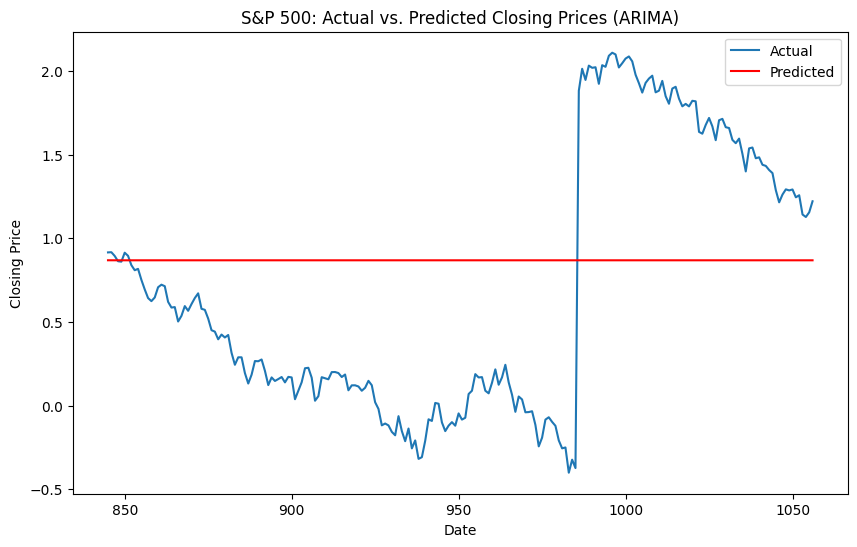

Mean Squared Error (ARIMA): 0.6331145031597637


In [350]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model_arima = ARIMA(train_sp['Close'], order=(1, 1, 0))
model_arima_fit = model_arima.fit()

# Make predictions
predictions_arima = model_arima_fit.forecast(steps=len(test_sp))

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_sp.index, test_sp['Close'], label='Actual')
plt.plot(test_sp.index, predictions_arima, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('S&P 500: Actual vs. Predicted Closing Prices (ARIMA)')
plt.legend()
plt.show()

# Compute Mean Squared Error (MSE)
mse_arima = mean_squared_error(test_sp['Close'], predictions_arima)
print("Mean Squared Error (ARIMA):", mse_arima)



In [296]:
from pmdarima.arima import auto_arima

# Use auto-arima to find the best SARIMA model
sarima_model = auto_arima(train_sp['Close'], seasonal=True, m=7, trace=True)

# Print the summary of the best model
print(sarima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=-1039.969, Time=1.35 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-1050.045, Time=0.17 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=-1048.990, Time=0.52 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-1048.831, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=-1051.907, Time=0.09 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=-1049.234, Time=0.29 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=-1049.150, Time=0.38 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=-1047.805, Time=1.29 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=-1050.221, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=-1050.083, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=-1048.928, Time=0.55 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 5.697 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:       

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


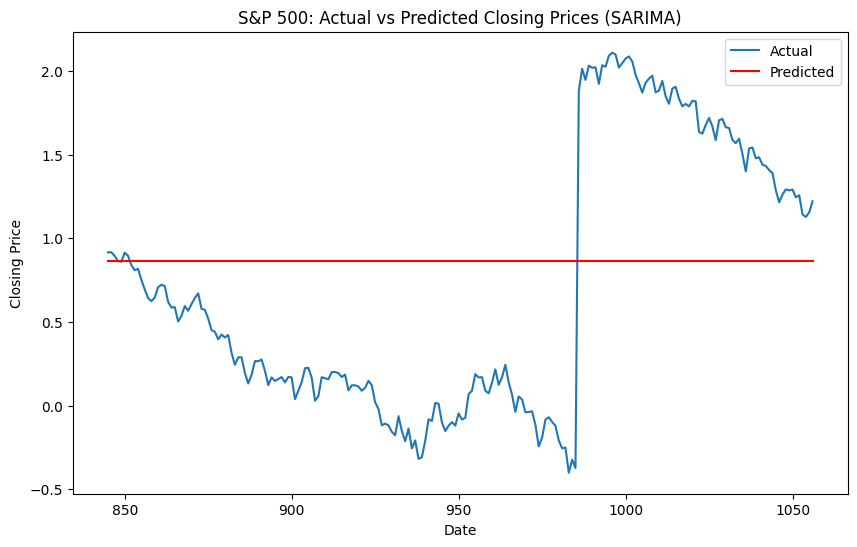

In [297]:
# Make predictions using the SARIMA model
predictions_sarima = sarima_model.predict(n_periods=len(test_sp))

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_sp.index, test_sp['Close'], label='Actual')
plt.plot(test_sp.index, predictions_sarima, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('S&P 500: Actual vs Predicted Closing Prices (SARIMA)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  844
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 826.380
Date:                Sun, 14 Apr 2024   AIC                          -1640.759
Time:                        23:52:39   BIC                          -1612.338
Sample:                             0   HQIC                         -1629.868
                                - 844                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0185      0.032     -0.573      0.567      -0.082       0.045
ar.L2         -0.0314      0.030     -1.057      0.291      -0.090       0.027
ar.L3         -0.0418      0.031     -1.360      0.1

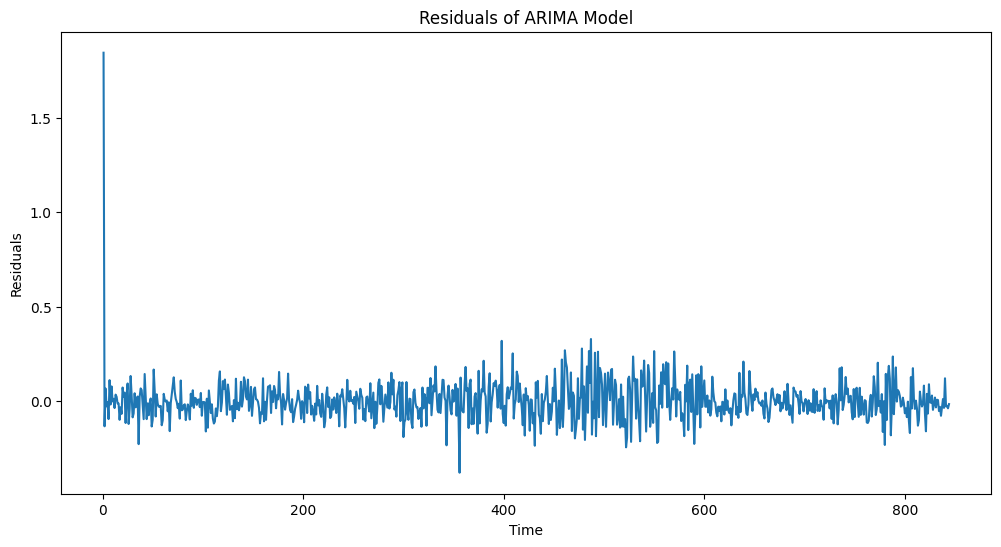

In [298]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Define the ARIMA model parameters
p = 5  # AR parameter
d = 1  # Differencing parameter
q = 0  # MA parameter

# Train the ARIMA model on the training data
model_nasdaq = ARIMA(train_nasdaq['Close'], order=(p, d, q))
model_nasdaq_fit = model_nasdaq.fit()

# Evaluate the ARIMA model
print(model_nasdaq_fit.summary())

# Plot the residuals of the ARIMA model
plt.figure(figsize=(12, 6))
plt.plot(model_nasdaq_fit.resid)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()


# **5. Review PyInform https://elife-asu.github.io/PyInform/index.html, and use transfer**
# **entropy to make prediction of the index, for example, based on Nasdaq and S&P500 to**
# **predict S&P500, or vice versa**

Mean Squared Error (Random Forest with Nasdaq as predictor): 1.5105085897748307


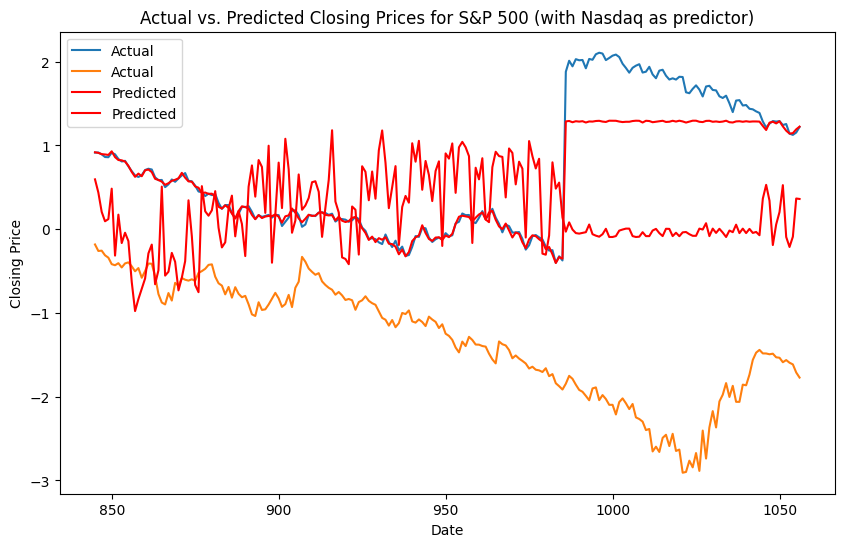

In [299]:
from sklearn.ensemble import RandomForestRegressor

# Concatenate Nasdaq data with the S&P 500 training dataset
train_sp_nasdaq = pd.concat([train_sp, train_nasdaq['Close']], axis=1)

# Concatenate Nasdaq data with the S&P 500 test dataset
test_sp_nasdaq = pd.concat([test_sp, test_nasdaq['Close']], axis=1)

# Train a Random Forest model using Nasdaq as an additional predictor
rf_model_sp_with_nasdaq = RandomForestRegressor(n_estimators=100)
rf_model_sp_with_nasdaq.fit(train_sp_nasdaq.drop(columns=['Date', 'Close']), train_sp_nasdaq['Close'])

# Make predictions for the S&P 500 using Nasdaq data
predictions_rf_sp_with_nasdaq = rf_model_sp_with_nasdaq.predict(test_sp_nasdaq.drop(columns=['Date', 'Close']))

# Compute Mean Squared Error (MSE)
mse_rf_sp_with_nasdaq = mean_squared_error(test_sp_nasdaq['Close'], predictions_rf_sp_with_nasdaq)
print("Mean Squared Error (Random Forest with Nasdaq as predictor):", mse_rf_sp_with_nasdaq)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_sp_nasdaq.index, test_sp_nasdaq['Close'], label='Actual')
plt.plot(test_sp_nasdaq.index, predictions_rf_sp_with_nasdaq, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs. Predicted Closing Prices for S&P 500 (with Nasdaq as predictor)')
plt.legend()
plt.show()




Mean Squared Error (Random Forest with Nasdaq as predictor): 0.40746027322793665


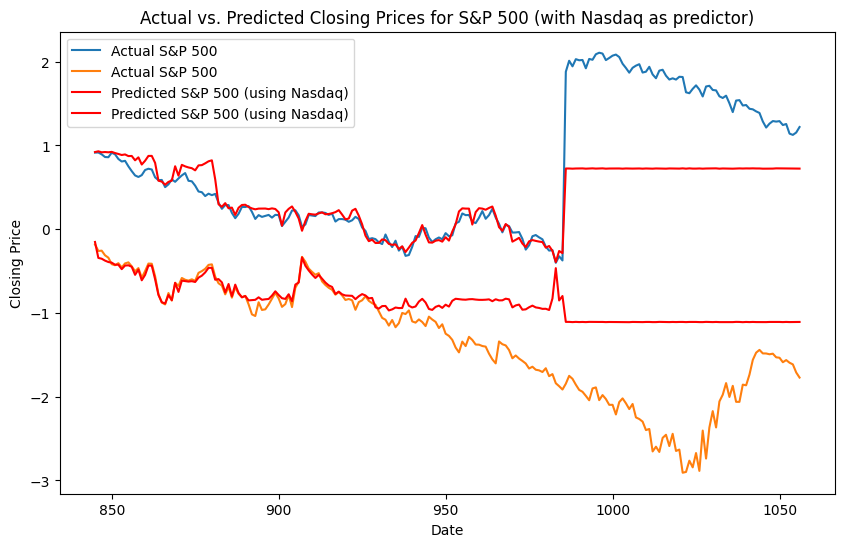

In [300]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model using Nasdaq as an additional predictor
rf_model_sp_with_nasdaq = RandomForestRegressor(n_estimators=100)
rf_model_sp_with_nasdaq.fit(train_sp_nasdaq.drop(columns=['Date']), train_sp_nasdaq['Close'])

# Make predictions for the S&P 500 using Nasdaq data
predictions_rf_sp_with_nasdaq = rf_model_sp_with_nasdaq.predict(test_sp_nasdaq.drop(columns=['Date']))

# Compute Mean Squared Error (MSE)
mse_rf_sp_with_nasdaq = mean_squared_error(test_sp_nasdaq['Close'], predictions_rf_sp_with_nasdaq)
print("Mean Squared Error (Random Forest with Nasdaq as predictor):", mse_rf_sp_with_nasdaq)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_sp_nasdaq.index, test_sp_nasdaq['Close'], label='Actual S&P 500')
plt.plot(test_sp_nasdaq.index, predictions_rf_sp_with_nasdaq, label='Predicted S&P 500 (using Nasdaq)', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs. Predicted Closing Prices for S&P 500 (with Nasdaq as predictor)')
plt.legend()
plt.show()


# **7. Using Neural Network, MLPRegressor, to make predictions.**

In [301]:
# Remove extra features from the training data
train_sp_nasdaq_subset = train_sp_nasdaq[[ 'Close']]


In [302]:
# Check the data types of columns in train_sp_nasdaq
print("Data types of columns in train_sp_nasdaq:")
print(train_sp_nasdaq.dtypes)

# Check the data type of y_train
print("\nData type of y_train:")
print(y_train.dtypes)


Data types of columns in train_sp_nasdaq:
Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Close_diff           float64
Close                float64
dtype: object

Data type of y_train:
Close    float64
Close    float64
dtype: object


In [303]:
# Remove one of the duplicate 'Close' columns from train_sp_nasdaq
train_sp_nasdaq = train_sp_nasdaq.drop(columns=['Close'])

# Check the updated columns in train_sp_nasdaq
print("Columns in train_sp_nasdaq after removing duplicate 'Close' column:")
print(train_sp_nasdaq.columns)


Columns in train_sp_nasdaq after removing duplicate 'Close' column:
Index(['Date', 'Open', 'High', 'Low', 'Close_diff'], dtype='object')


Mean Squared Error (MLP with Nasdaq as predictor): 1.455300670864595


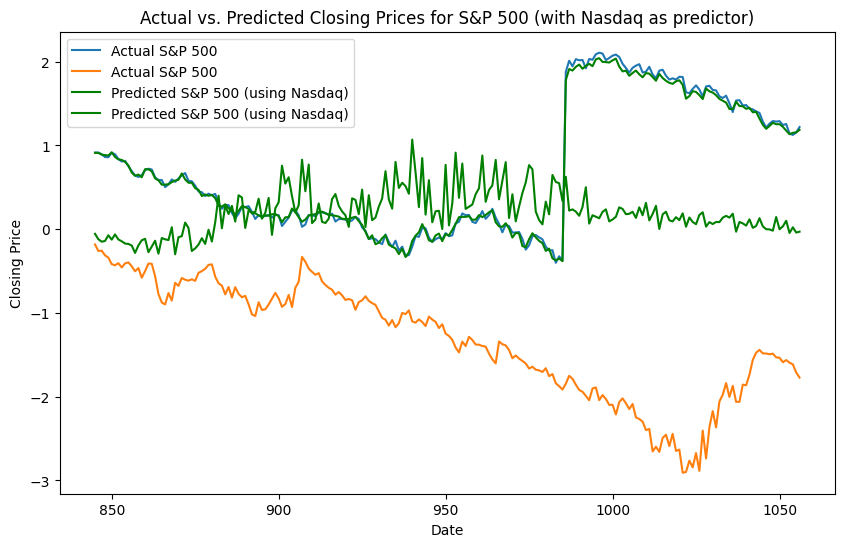

In [326]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# Assuming 'train_sp_nasdaq' and 'test_sp_nasdaq' DataFrames are already defined

# Initialize the MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)

# Extract features and target variable for training
X_train = train_sp_nasdaq.drop(columns=['Date'])  # Remove 'Date' column


# Fit the model to the training data
mlp_model.fit(X_train, y_train)

# Extract features for testing
X_test = test_sp_nasdaq.drop(columns=['Close', 'Date'])  # Remove 'Close' and 'Date' columns

# Make predictions for the S&P 500 using Nasdaq data
predictions_mlp_sp_with_nasdaq = mlp_model.predict(X_test)

# Compute Mean Squared Error (MSE)
mse_mlp_sp_with_nasdaq = mean_squared_error(test_sp_nasdaq['Close'], predictions_mlp_sp_with_nasdaq)
print("Mean Squared Error (MLP with Nasdaq as predictor):", mse_mlp_sp_with_nasdaq)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_sp_nasdaq.index, test_sp_nasdaq['Close'], label='Actual S&P 500')
plt.plot(test_sp_nasdaq.index, predictions_mlp_sp_with_nasdaq, label='Predicted S&P 500 (using Nasdaq)', color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs. Predicted Closing Prices for S&P 500 (with Nasdaq as predictor)')
plt.legend()
plt.show()



# **# 8.  prediction of  the closing index value of S&P 500 on April 15, 16, 17, 18, 19**


In [327]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Assuming 'train_sp_nasdaq' and 'test_sp_nasdaq' DataFrames are already defined

# Initialize the MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)

# Extract features and target variable for training
X_train = train_sp_nasdaq.drop(columns=['Date'])  # Remove 'Date' column


# Fit the model to the training data
mlp_model.fit(X_train, y_train)

# Generate future dates for April 15 to April 19, 2024
future_dates_datetime = pd.date_range(start='2024-04-15', end='2024-04-19')

# Prepare the features for prediction
future_data = np.empty((len(future_dates_datetime), X_train.shape[1]))  # Initialize an empty NumPy array
for i, date in enumerate(future_dates_datetime):
    future_data[i] = date.toordinal()  # Convert date to ordinal representation and set it in the first column of each row

# Use the trained MLPRegressor model to make predictions
predictions_future = mlp_model.predict(future_data)

# Print the predicted values
for date, prediction in zip(future_dates_datetime, predictions_future):
    print(f"Predicted closing index value of S&P 500 on {date.date()}: {prediction}")


Predicted closing index value of S&P 500 on 2024-04-15: [732012.89216911 -20660.43685297]
Predicted closing index value of S&P 500 on 2024-04-16: [732013.88272587 -20660.46481113]
Predicted closing index value of S&P 500 on 2024-04-17: [732014.87328262 -20660.49276928]
Predicted closing index value of S&P 500 on 2024-04-18: [732015.86383938 -20660.52072744]
Predicted closing index value of S&P 500 on 2024-04-19: [732016.85439614 -20660.5486856 ]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
